**Yennifer Yuliana Guerrero Uchima**

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo




In [ ]:
# librerías ==================================

import numpy as np
from scipy import integrate
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pylab as plt

**Punto A**

In [ ]:
df = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")
df.head()

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107


In [ ]:
X = df['hours']
Y = df['followers']

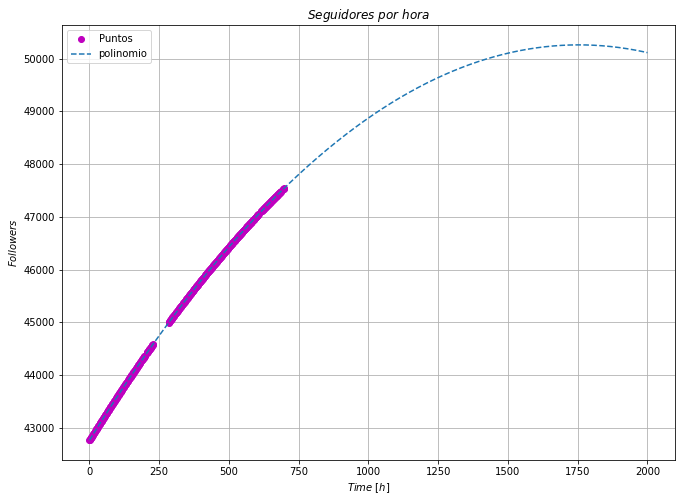

In [ ]:
coef = np.polyfit(X, Y, 2)   # Interpolación de los datos con un polinomio de grado 2
f = np.poly1d(coef)       # Convertimos a una función

x = np.linspace(0, 2000, 4000)

plt.figure(figsize=(11,8))
plt.plot(X,f(X), 'o', c='m', label='Puntos')
plt.plot(x, f(x), '--', label='polinomio')
plt.xlabel('$Time$ $[h]$')
plt.ylabel('$Followers$')
plt.title('$Seguidores \ por \ hora$')
plt.legend()
plt.grid()

**Nota**

Como la función es cuadr

Observemos que la curva que describe el crecimiento de los seguidores en función del tiempo es una parábola cuya concavidad es hacia abajo y creciente antes de llegar al máximo de la función, esto nos permite concluir que la pendiente es una línea recta en función del tiempo y es decreciente.

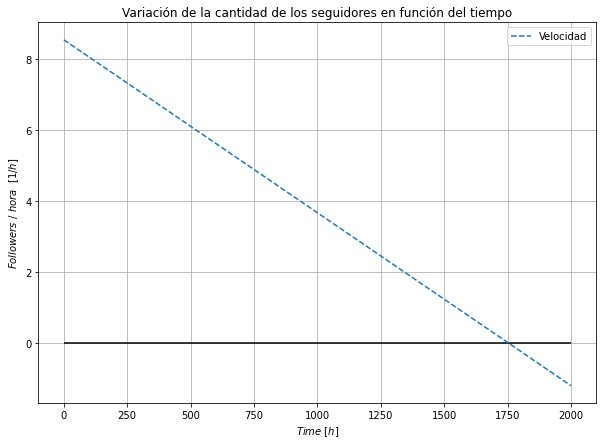

In [ ]:
''' ============ Punto 1 ============ ''' 

v = f.deriv()     # Pendiente en función del tiempo = derivada

plt.figure(figsize=(10,7))
plt.plot(x, v(x), '--', label='Velocidad')
plt.hlines(0, 0, 2000)
plt.xlabel('$Time$ $[h]$')
plt.ylabel('$Followers \ / \ hora$  $[1/h]$')
plt.title('Variación de la cantidad de los seguidores en función del tiempo')
plt.legend()
plt.grid()

In [ ]:
Mv = v(0)     # Velocidad inicial de incremento

print('La velocidad inicial de incremento es', Mv, '[seguidores por hora]')


La velocidad inicial de incremento es 8.552137792664016 [seguidores por hora]


Como la velocidad de variación de los seguidores es una línea recta, entonces la aceleración con la que decrece esta función es constante.

In [ ]:
''' ============ Punto 2 ============ ''' 

ac = v.deriv()

print('La aceleración de decrecimiento de la cantidad de seguidores es', ac, '[seguidores por hora²]')

La aceleración de decrecimiento de la cantidad de seguidores es  
-0.004875 [seguidores por hora²]


In [ ]:
''' ============ Punto 3 ============ ''' 

M = optimize.fmin_powell(-f,680)    # Hora en la que se tiene más seguidores
Max = abs(f(M))     # valor máximo de f

print('-------------------------------------------------------------------------')
print('\nEl número máximo de seguidores es', Max, 'que se obtiene a la hora', M)

Optimization terminated successfully.
         Current function value: -50262.136729
         Iterations: 2
         Function evaluations: 28
-------------------------------------------------------------------------

El número máximo de seguidores es 50262.136729011865 que se obtiene a la hora 1754.1931385701214


In [ ]:
''' ============ Punto 4 ============ ''' 

import datetime as dt

h = float(M)
fecha = df['date_time'][0] + dt.timedelta(hours = h)
print('La fecha del máximo sería en: {}'.format(fecha))

La fecha del máximo sería en: 2021-10-17 00:18:28.966852


**Punto B**

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Cualquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

**Solución**

 Notemos que para diferentes valores de $\alpha$ obtenemos una integral diferente
$$I(\alpha)=\int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

$$
S_i(\alpha)=\frac{T}{T_0}=\frac{2}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.

In [ ]:

I= lambda α: integrate.quad(lambda ϕ:1/np.sqrt(1-np.sin(α/2)**2*np.sin(ϕ)**2),0,np.pi/2)[0]
a

In [ ]:

""" input:
    recibe un valor de α o un arreglo de valores de α
    Output:
    funcion entrega el valor de T/T_0 
"""
def Si(t):
    try:
        nn=np.array(t).shape[0]
        f=np.vectorize(I)
    except IndexError:
        f=I
    return f(t)*2/np.pi

alpha = np.linspace(0,np.pi/2,100)#valores enteros de alpha en radianes
Si(alpha)

array([1.        , 1.00001573, 1.00006294, 1.00014163, 1.00025181,
       1.0003935 , 1.00056673, 1.00077153, 1.00100793, 1.00127597,
       1.00157571, 1.00190719, 1.00227047, 1.00266561, 1.00309268,
       1.00355177, 1.00404293, 1.00456628, 1.00512189, 1.00570986,
       1.0063303 , 1.00698332, 1.00766903, 1.00838755, 1.00913901,
       1.00992355, 1.01074131, 1.01159243, 1.01247707, 1.01339538,
       1.01434753, 1.0153337 , 1.01635406, 1.0174088 , 1.01849811,
       1.0196222 , 1.02078127, 1.02197553, 1.02320522, 1.02447055,
       1.02577177, 1.02710911, 1.02848285, 1.02989323, 1.03134052,
       1.03282501, 1.03434697, 1.03590671, 1.03750453, 1.03914074,
       1.04081567, 1.04252964, 1.04428299, 1.04607609, 1.04790929,
       1.04978296, 1.05169749, 1.05365326, 1.05565069, 1.05769018,
       1.05977217, 1.0618971 , 1.06406541, 1.06627758, 1.06853407,
       1.07083538, 1.07318201, 1.07557448, 1.07801332, 1.08049907,
       1.08303231, 1.0856136 , 1.08824354, 1.09092274, 1.09365

2. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 

In [ ]:
df = pd.DataFrame({'α [rad]':alpha,'α [°]':alpha*180/np.pi,'T/T0':Si(alpha)})

In [ ]:
df

,α [rad],α [°],T/T0
0,0.000000,0.000000,1.000000
1,0.015867,0.909091,1.000016
2,0.031733,1.818182,1.000063
3,0.047600,2.727273,1.000142
4,0.063467,3.636364,1.000252
...,...,...,...
95,1.507330,86.363636,1.163806
96,1.523196,87.272727,1.167832
97,1.539063,88.181818,1.171930
98,1.554930,89.090909,1.176099


3. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 

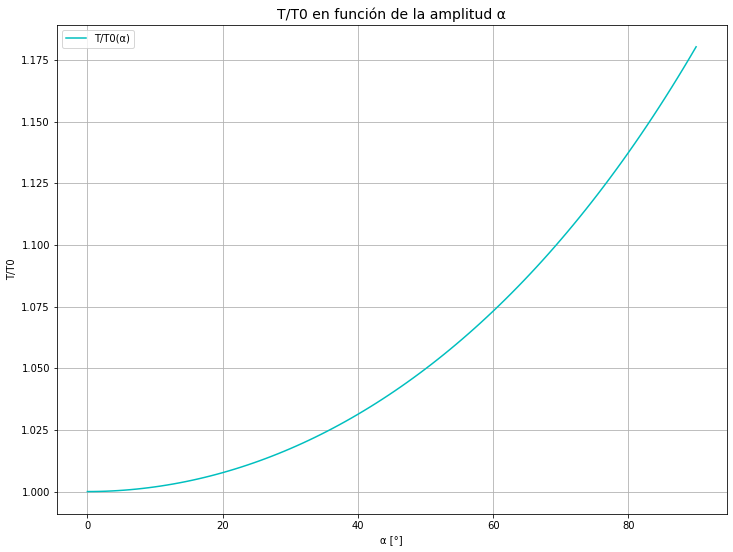

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(df['α [°]'],df['T/T0'],'c',label = 'T/T0(α)')
plt.title('T/T0 en función de la amplitud α',size=14)
plt.ylabel('T/T0')
plt.xlabel('α [°]')
plt.grid()
plt.legend()
plt.show()

4. Explain the result when $\alpha = 0.$ 

Cuando $\alpha \longrightarrow 0$ la amplitud es cada vez más pequeña y por lo tanto el periodo se aproxima al periodo del pendulo a amplitudes pequeñas y
$T\longrightarrow  T_0$, por tanto $
\frac{T}{T_0} = 1
$